<a href="https://colab.research.google.com/github/martinjamouss/ML-Lab/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the US Perminent Visas using zip extractor

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

Exception ignored in: <function ZipFile.__del__ at 0x7f0ed7d13700>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
  File "/usr/lib/python3.8/zipfile.py", line 1843, in close
  File "/usr/lib/python3.8/zipfile.py", line 1953, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [ ]:
df_select = df[["case_status", "job_info_education", "ji_offered_to_sec_j_foreign_worker", "job_info_work_state", "ri_layoff_in_past_six_months"]]

# 3.) Clean your data for a decision tree


In [ ]:
X = pd.get_dummies(df_select[["job_info_education", "ji_offered_to_sec_j_foreign_worker", "job_info_work_state", "ri_layoff_in_past_six_months"]])
y = df_select["case_status"]

In [ ]:
y

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

# 4.) Fit and plot a decision tree of depth X


In [ ]:
from sklearn import tree

[Text(0.5, 0.875, 'job_info_education_None <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.25, 0.625, 'ri_layoff_in_past_six_months_N <= 0.5\ngini = 0.593\nsamples = 351595\nvalue = [171290, 142185, 21903, 16217]'),
 Text(0.125, 0.375, 'job_info_work_state_WASHINGTON <= 0.5\ngini = 0.627\nsamples = 144229\nvalue = [65136, 57226, 13120, 8747]'),
 Text(0.0625, 0.125, 'gini = 0.628\nsamples = 137656\nvalue = [62649, 53654, 12951, 8402]'),
 Text(0.1875, 0.125, 'gini = 0.558\nsamples = 6573\nvalue = [2487, 3572, 169, 345]'),
 Text(0.375, 0.375, 'ji_offered_to_sec_j_foreign_worker_Y <= 0.5\ngini = 0.567\nsamples = 207366\nvalue = [106154, 84959, 8783, 7470]'),
 Text(0.3125, 0.125, 'gini = 0.547\nsamples = 128393\nvalue = [71216, 48639, 4691, 3847]'),
 Text(0.4375, 0.125, 'gini = 0.588\nsamples = 78973\nvalue = [34938, 36320, 4092, 3623]'),
 Text(0.75, 0.625, 'ji_offered_to_sec_j_foreign_worker_Y <= 0.5\ngini = 0.668\nsamples = 22767\nvalue = [10643, 

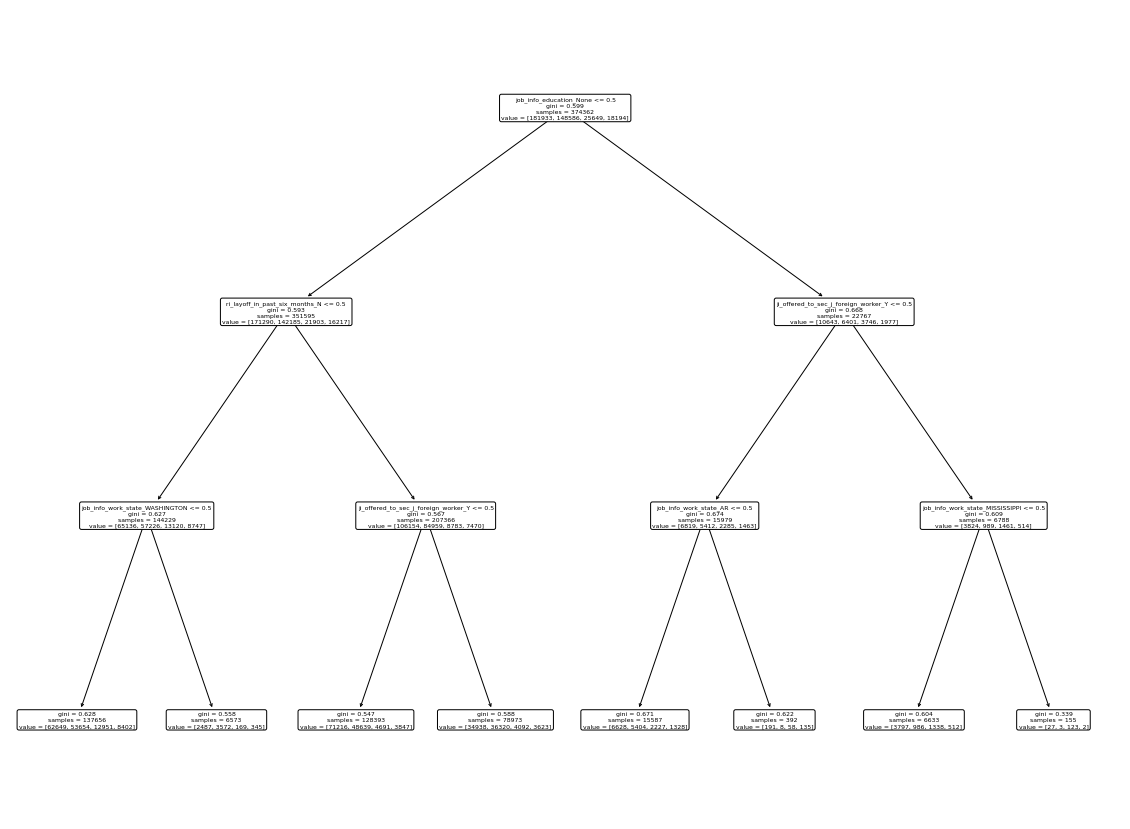

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X,y)
plt.figure(figsize = (20,15))
tree.plot_tree(clf, max_depth = 3, rounded = True, feature_names = X.columns)


# 5.) Write your interpretation of the largest (by sample size) leaf node


The top node, also known as the root node, represents the entire dataset and is the starting point for the tree's recursive partitioning process. The root node applies a decision rule to split the data into two or more subsets based on the value of a chosen feature or attribute. For this example, it may split the data into subsets where the job_info_education predictor is less than or equal to 0.5 in one subset, and greater than 0.5 in another subset.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
max_depths = [1,2,3,4,5,6]
outputs = []

In [ ]:
for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth= md) 
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred) 
  outputs.append(accuracy)
print(outputs)

[0.4875748745345637, 0.4875748745345637, 0.49362959365387726, 0.49494090982677674, 0.4972964222114295, 0.49685122227618583]


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

In [ ]:
max_depth_range = np.arange(1,3)

In [ ]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid={'max_depth': max_depth_range}, cv=5) 
grid.fit(X_train, y_train)
best_max_depth = grid.best_params_['max_depth']
dt_final = DecisionTreeClassifier(max_depth=best_max_depth) 
dt_final.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)